# All Required Packages are import

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

## Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r'E:\Student Performance Prediction\notebook\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:

df['avg_score'] = (df['math score']+df['reading score']+df['writing score'])/3

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [5]:
print("Number of categories in 'gender' variable --> {}".format(df['gender'].unique()))
print()
print("Number of categories in 'race/ethnicity' variable --> {}".format(df['race/ethnicity'].unique()))
print()
print("Number of categories in 'lunch' variable --> {}".format(df['lunch'].unique()))
print()
print("Number of categories in 'test preparation course' variable --> {}".format(df['test preparation course'].unique()))
print()
print("Number of categories in 'parental level of education' variable --> {}".format(df['parental level of education'].unique()))

Number of categories in 'gender' variable --> ['female' 'male']

Number of categories in 'race/ethnicity' variable --> ['group B' 'group C' 'group A' 'group D' 'group E']

Number of categories in 'lunch' variable --> ['standard' 'free/reduced']

Number of categories in 'test preparation course' variable --> ['none' 'completed']

Number of categories in 'parental level of education' variable --> ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [6]:
# Split dependent and independent data
x = df.drop('avg_score',axis=1)
y = df['avg_score']

In [7]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
y

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: avg_score, Length: 1000, dtype: float64

In [9]:
categorical_features = x.select_dtypes(include='object').columns
numerical_features = x.select_dtypes(exclude='object').columns

In [10]:
categorical_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [11]:
numerical_features

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer #Handle missing value
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='median')),
        ("scaler", StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("encoder", OneHotEncoder(handle_unknown='ignore'))
    ]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipeline", num_pipeline, numerical_features),
        ("categorical_pipeline", categorical_pipeline, categorical_features)
    ]
)




In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [14]:
x_train = pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
x_test = pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [15]:
x_train.head()

,num_pipeline__math score,num_pipeline__reading score,num_pipeline__writing score,categorical_pipeline__gender_female,categorical_pipeline__gender_male,categorical_pipeline__race/ethnicity_group A,categorical_pipeline__race/ethnicity_group B,categorical_pipeline__race/ethnicity_group C,categorical_pipeline__race/ethnicity_group D,categorical_pipeline__race/ethnicity_group E,categorical_pipeline__parental level of education_associate's degree,categorical_pipeline__parental level of education_bachelor's degree,categorical_pipeline__parental level of education_high school,categorical_pipeline__parental level of education_master's degree,categorical_pipeline__parental level of education_some college,categorical_pipeline__parental level of education_some high school,categorical_pipeline__lunch_free/reduced,categorical_pipeline__lunch_standard,categorical_pipeline__test preparation course_completed,categorical_pipeline__test preparation course_none
0,-0.299452,0.030791,0.434053,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.033050,0.930290,0.964701,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.832756,1.345443,1.163694,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.366053,-0.176786,-0.162925,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.433153,-0.384363,-0.759904,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [16]:
x_train.shape,x_test.shape

((800, 20), (200, 20))

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0552
- Mean Absolute Error: 0.8431
- R2 Score: 0.9944
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1040
- Mean Absolute Error: 0.8679
- R2 Score: 0.9943


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0079
- Mean Absolute Error: 0.0064
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0087
- Mean Absolute Error: 0.0066
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2431
- Mean Absolute Error: 1.7609
- R2 Score: 0.9748
-----------------------

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
6,XGBRegressor,0.995422
1,Lasso,0.994314
5,Random Forest Regressor,0.994196
7,CatBoosting Regressor,0.993443
4,Decision Tree,0.988607
8,AdaBoost Regressor,0.976319
3,K-Neighbors Regressor,0.956571


Text(0, 0.5, 'Predicted')

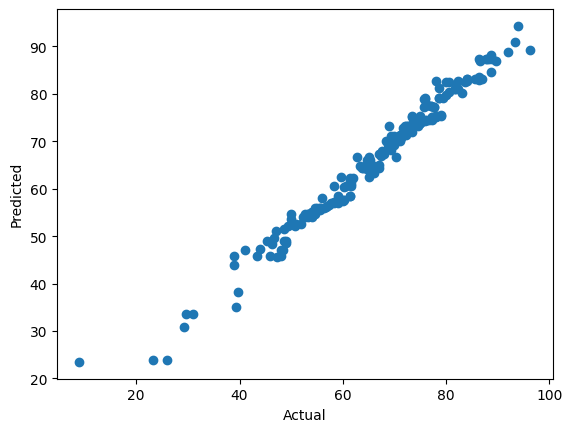

In [19]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='avg_score'>

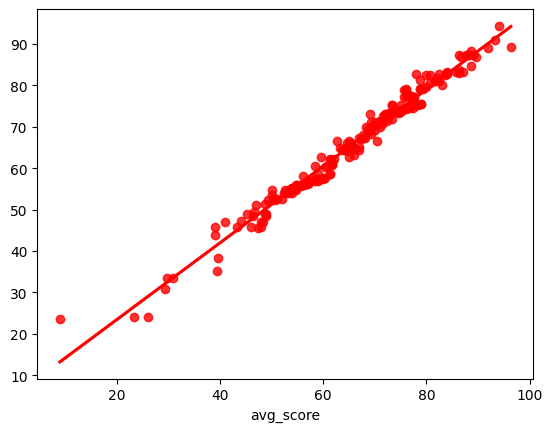

In [22]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red')

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,87.000000,83.241667,3.758333
737,64.000000,64.316574,-0.316574
740,75.000000,73.792651,1.207349
660,74.666667,73.585859,1.080808
411,81.666667,81.135659,0.531008
...,...,...,...
408,55.000000,55.909091,-0.909091
332,57.000000,56.298507,0.701493
208,77.000000,77.494048,-0.494048
613,72.000000,72.795635,-0.795635
